# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

Los principales datos que creo me ayudarian a trabajar el problema planteado son:
* Superficie total y cubierta (mtrs2),
* En que zona se ubica,
* Tipo de propiedad,
* Si cuenta con Amenities, el caso de propiedad horizontal o barrios privados,
* Cantidad de habitaciones,
* Cantidad de baños,
* Fecha de construcción de la vivienda.

Pienso asi, ya que cada calle o zona tiene un valor por mt2 predeterminado y el mismo se va ajustando de acuerdo a las caractiristicas principales de la vivienda y las facilidades o comodidades que otorgue(como ser si hay supermercados, gymnasios, etc dentro del barrio), como ser si tiene patio o balcon(diferencia entre mt2 cubiertos y mt2 totales), antiguedad en la construccion (esto se hace para filtrar posibles inconvenientes que se puedan dar en cañerias y sistemas electricos), etc.

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

**IMPORTAMOS LIBRERIAS**, herramientas necesarias para hacer un EDA (análisis exploratorio de datos)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
#%matplotlib inline 
sns.set(color_codes=True)

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [2]:
# Carga del dataset con pandas
df = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

In [3]:
# Averiguamos ctas filas y columnas tiene
df.shape

(146660, 19)

In [4]:
# Visualizamos las 5 primeras instancias
df.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


**ADICIONAL**
Puedo ver si todo es venta en usd

In [5]:
# Verifico cuáles son los tipos de operaciones que tenemos en nuestro dataset
operaciones = np.unique(df['operation_type'])
print(operaciones)

['Venta']


In [6]:
moneda = np.unique(df['currency'])
print(moneda)

['USD']


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [7]:
# Imprimimos en pantalla los nombres de las columnas
print(df.columns)

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')


In [8]:
#Vemos cuantos valores faltantes hay por columna
df.isna().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

In [9]:
#Calculamos el porcentaje de valores faltantes por columna
df.isna().sum()/df.shape[0]*100

start_date          0.000000
end_date            0.000000
created_on          0.000000
lat                 6.767353
lon                 6.790536
l1                  0.000000
l2                  0.000000
l3                  0.000000
rooms               0.000000
bedrooms            0.000000
bathrooms           4.061776
surface_total      13.996318
surface_covered    14.737488
price               0.000000
currency            0.000000
title               0.000000
description         0.000000
property_type       0.000000
operation_type      0.000000
dtype: float64

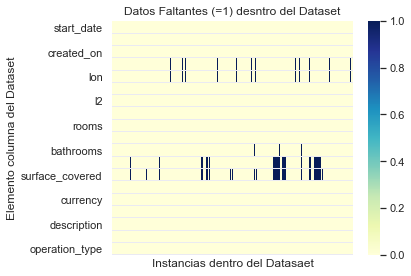

In [6]:
#Podemos ver en un grafico la distribucion de los valores faltantes:
Dat = df.isnull()
heat=sns.heatmap(Dat.T, cmap= 'YlGnBu',xticklabels=False)
plt.title('Datos Faltantes (=1) desntro del Dataset')
plt.xlabel('Instancias dentro del Datasaet')
plt.ylabel('Elemento columna del Dataset')
plt.tight_layout()

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [24]:
# Averiguamos cuantos tipos de propiedades hay en el dataset
print('En el dataset hay',len(pd.unique(df['property_type'])), 'tipos de propiedades')

En el dataset hay 10 tipos de propiedades


In [25]:
# Averiguamos cuantos instancias hay por tipos de propiedades hay en el dataset
df.groupby(['property_type']).size().sort_values(ascending=False)

property_type
Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
dtype: int64

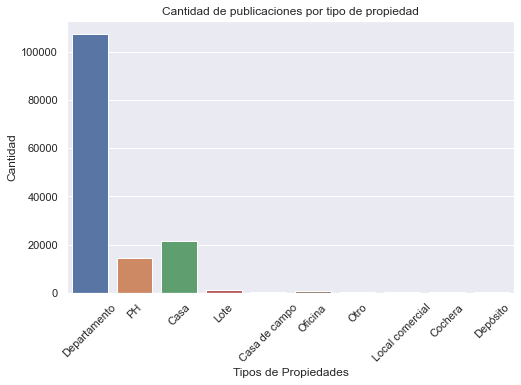

In [68]:
# Graficamos
plt.figure(figsize=(8,5))
sns.countplot(data = df, x = 'property_type')
plt.title('Cantidad de publicaciones por tipo de propiedad')
plt.ylabel('Cantidad')
plt.xlabel('Tipos de Propiedades')
plt.xticks(rotation = 45)
#plt.yticks(rotation = 45)
plt.show()

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

In [26]:
# Vamos a ver ctas instancias hay por cada dato
df.groupby(['l2']).size().sort_values(ascending=False)

l2
Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
dtype: int64

In [29]:
df.groupby(['l3']).size().sort_values(ascending=False).head()

l3
Palermo      13073
Tigre         8718
Almagro       7527
Belgrano      6935
Caballito     6650
dtype: int64

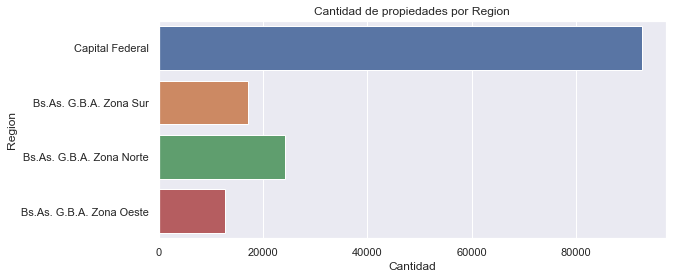

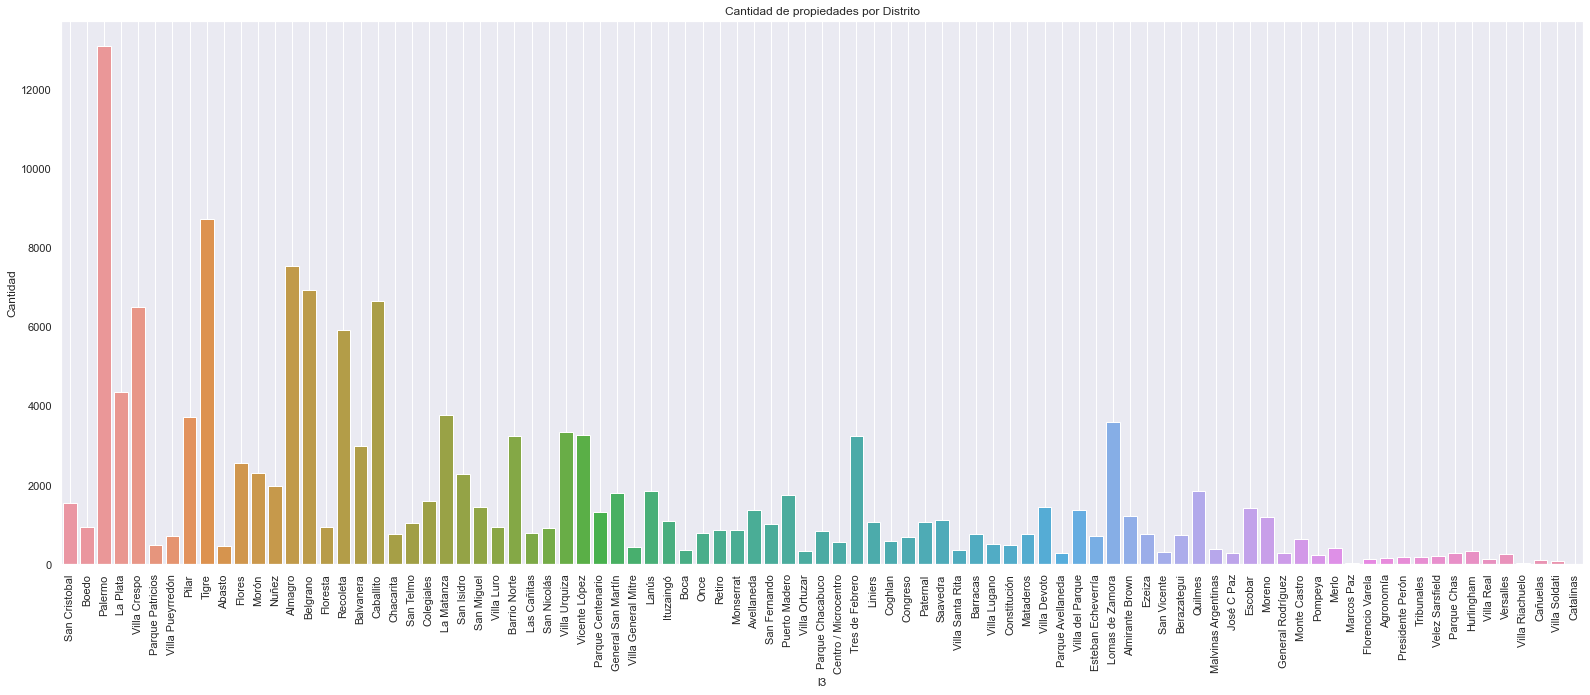

In [30]:
# GRAFICAMOS
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.countplot(data = df, y = 'l2')
plt.title('Cantidad de propiedades por Region')
plt.xlabel('Cantidad')
plt.ylabel('Region')
#plt.xticks(rotation = 45)


plt.figure(figsize=(60,10))
plt.subplot(1,2,2)
sns.countplot(data = df, x = 'l3')
plt.title('Cantidad de propiedades por Distrito')
plt.ylabel('Cantidad')
plt.xticks(rotation = 90)    

plt.grid()
plt.show()

C:\Users\jaeln\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jaeln\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


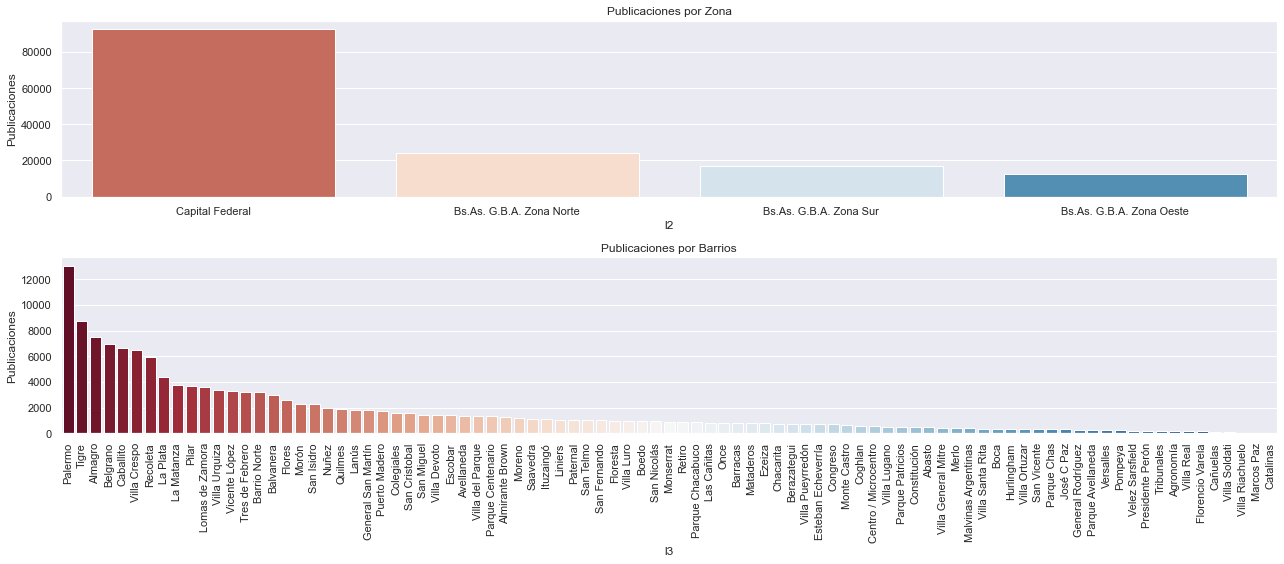

In [10]:
# Otra forma de graficar:
fig, axarr = plt.subplots(2, figsize=(18,8))
sns.countplot(df['l2'], ax= axarr[0], palette='RdBu', order= df['l2'].value_counts().index)
sns.countplot(df['l3'], ax= axarr[1], palette='RdBu', order= df['l3'].value_counts().index)
plt.setp(plt.xticks()[1], rotation=90)

plt.setp(axarr[0], ylabel='Publicaciones')
plt.setp(axarr[1], ylabel='Publicaciones')

axarr[0].title.set_text('Publicaciones por Zona') 
axarr[1].title.set_text('Publicaciones por Barrios')

plt.tight_layout()
plt.show()

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

**Filtrando el Dataset:** 

1. Tres clases más abundantes de tipos de propiedad: 'Departamento', 'Casa' y 'PH'


2. Región con más propiedades publicadas: 'Capital Federal' - 'Palermo'

In [3]:
region = ['Capital Federal']
tipos = ['Departamento', 'Casa' , 'PH']

In [4]:
filtro = df[df.property_type.isin(tipos) & df.l2.isin(region)]
filtro.shape

(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [5]:
# Eliminamos valores nulos:
filtro.dropna(inplace=True)
filtro.shape

<ipython-input-5-0aa4d942fbc1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro.dropna(inplace=True)


(76961, 19)

In [6]:
# vemos las estadisticas para las variaples que necesitamos
columns = ['rooms', 'bedrooms','bathrooms', 'surface_total','surface_covered', 'price', 'property_type']
data6 = filtro[columns]
data6.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,76961.000000,76961.000000,76961.000000,76961.000000,76961.000000,7.696100e+04
mean,3.005223,1.998857,1.538610,113.103000,95.086940,2.587050e+05
std,1.306747,1.051604,0.838084,1015.102403,804.084792,3.248616e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.240000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.780000e+05
75%,4.000000,3.000000,2.000000,110.000000,95.000000,2.780000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


Del analisis de estadisticos, podemos ver a simple vista mediante la desviación estandar y de la amplitud que hay entre los max de la media, la existencia de valores atítipos, especialmente en Superficie Total y Cubierta. Por tal razón, vamos a tratar de visualizar dichos valores en cada una de las variables mediante el uso de boxplots, para saber si es necesario algun filtro adicional:

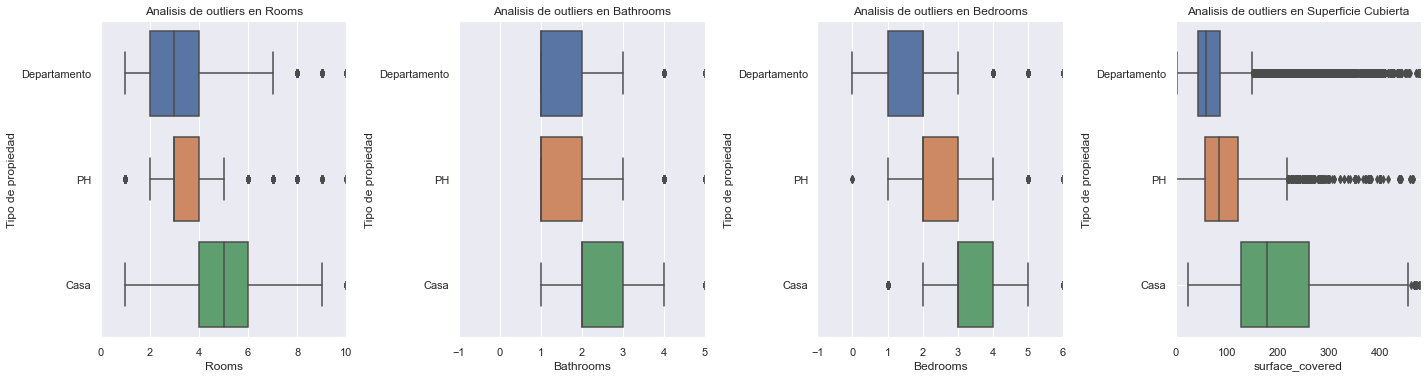

In [42]:
plt.figure(figsize=(5*4,10))

plt.subplot(2,4,1)
sns.boxplot(data = data6, x = 'rooms', y = 'property_type')
plt.title('Analisis de outliers en Rooms')
plt.xlabel('Rooms')
plt.ylabel('Tipo de propiedad')
plt.xlim(0,10) #definimos un xlim para hacer un grafico mas comprensible

plt.subplot(2,4,2)
sns.boxplot(data = data6, x = 'bathrooms', y = 'property_type')
plt.title('Analisis de outliers en Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Tipo de propiedad')
plt.xlim(-1,5) #definimos un xlim para hacer un grafico mas comprensible

plt.subplot(2,4,3)
sns.boxplot(data = data6, x = 'bedrooms', y = 'property_type')
plt.title('Analisis de outliers en Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Tipo de propiedad')
plt.xlim(-1,6) #definimos un xlim para hacer un grafico mas comprensible

plt.subplot(2,4,4)
sns.boxplot(data = data6, x = 'surface_covered', y = 'property_type')
plt.title('Analisis de outliers en Superficie Cubierta')
plt.xlabel('surface_covered')
plt.ylabel('Tipo de propiedad')
plt.xlim(0,480) #definimos un xlim para hacer un grafico mas comprensible

plt.tight_layout()
plt.grid()
plt.show()

De los boxplot podemos ver que para hacerlos comprensibles jugue manualmente con el xlim, donde filtro los outlieres, a continuacion voy a hacer el filtro efectivo en el dataset:

In [108]:
filtro_EDA= data6

In [110]:
filtro_EDA.drop(filtro_EDA.loc[(filtro_EDA['rooms']>10)].index, inplace=True)

C:\Users\jaeln\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [111]:
filtro_EDA.drop(filtro_EDA.loc[(filtro_EDA['bedrooms']>6)].index, inplace=True)

C:\Users\jaeln\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [112]:
filtro_EDA.drop(filtro_EDA.loc[(filtro_EDA['bathrooms']>5)].index, inplace=True)

C:\Users\jaeln\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [113]:
filtro_EDA.drop(filtro_EDA.loc[(filtro_EDA['surface_covered']>500)].index, inplace=True)

C:\Users\jaeln\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


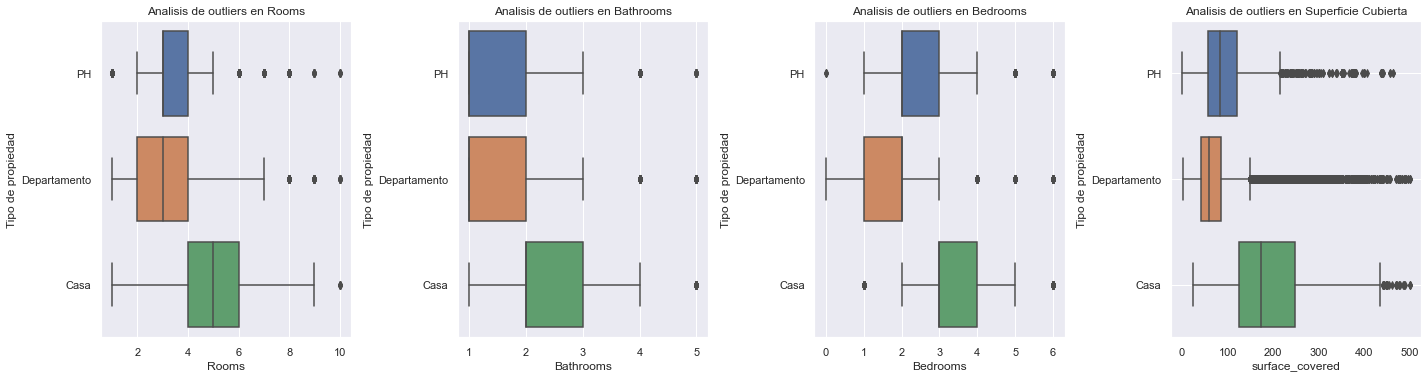

In [114]:
#Comprobamos en los boxplots si el filtro quedo bien hecho

plt.figure(figsize=(5*4,10))

plt.subplot(2,4,1)
sns.boxplot(data = filtro_EDA, x = 'rooms', y = 'property_type')
plt.title('Analisis de outliers en Rooms')
plt.xlabel('Rooms')
plt.ylabel('Tipo de propiedad')
#plt.xlim(0,10) #definimos un xlim para hacer un grafico mas comprensible

plt.subplot(2,4,2)
sns.boxplot(data = filtro_EDA, x = 'bathrooms', y = 'property_type')
plt.title('Analisis de outliers en Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Tipo de propiedad')
#plt.xlim(-1,5) #definimos un xlim para hacer un grafico mas comprensible

plt.subplot(2,4,3)
sns.boxplot(data = filtro_EDA, x = 'bedrooms', y = 'property_type')
plt.title('Analisis de outliers en Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Tipo de propiedad')
#plt.xlim(-1,6) #definimos un xlim para hacer un grafico mas comprensible

plt.subplot(2,4,4)
sns.boxplot(data = filtro_EDA, x = 'surface_covered', y = 'property_type')
plt.title('Analisis de outliers en Superficie Cubierta')
plt.xlabel('surface_covered')
plt.ylabel('Tipo de propiedad')
#plt.xlim(0,480) #definimos un xlim para hacer un grafico mas comprensible

plt.tight_layout()
plt.grid()
plt.show()

   B. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. 
     1.Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable. 
     
   C. Lo mismo ocurre con valores de superficie total muy chicos.

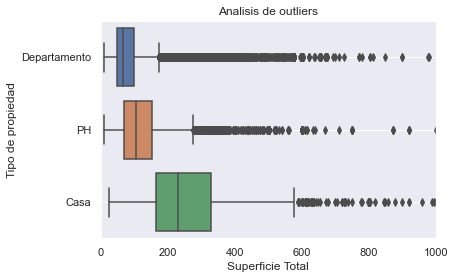

In [60]:
# creamos un boxplot que nos permite ver los cuartiles, media y outliers de la variable seleccionada.

sns.boxplot(data = data6, x = 'surface_total', y = 'property_type')
plt.title('Analisis de outliers')
plt.xlabel('Superficie Total')
plt.ylabel('Tipo de propiedad')
plt.xlim(0,1000) #definimos un xlim para hacer un grafico mas comprensible
plt.grid()
plt.show()

En el boxplot podemos analizar que la uinca forma de tener una correcta visualizacion del mismo es colocando un xlim que defina valores, esto es asi ya que estamos en presencia de muchos outliers, lo que vamos a hacer en lo siguiente es filtrar los mismos para terner un dataset mas limpio:

In [115]:
filtro_EDA= filtro_EDA[(15 <= filtro_EDA.surface_total) & (filtro_EDA.surface_total<= 1000)]
filtro_EDA.shape

(76270, 7)

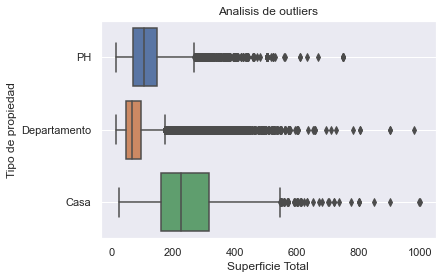

In [116]:
#graficamos comentando el xlim para contorlar la correcta eliminacion de outliers
sns.boxplot(data = filtro_EDA, x = 'surface_total', y = 'property_type')
plt.title('Analisis de outliers')
plt.xlabel('Superficie Total')
plt.ylabel('Tipo de propiedad')
#plt.xlim(0,1000) #definimos un xlim para hacer un grafico mas comprensible
plt.grid()
plt.show()

D. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.

Mediante el siguiente código vamos a pedir que elimine las propiedades donde la superficie total es menor que la cubierta:

In [117]:
#elimino las filas donde las superficie total es mayor que la cubierta
filtro_EDA = filtro_EDA[(filtro_EDA.surface_covered <= filtro_EDA.surface_total)]
filtro_EDA.shape

(75588, 7)

   E. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.

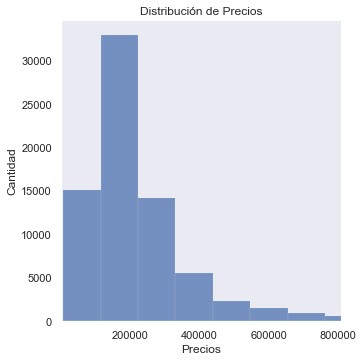

In [118]:
#Grafico para ver como estan distribuido los precios
sns.displot(data = filtro_EDA.price , bins= 300)
plt.title('Distribución de Precios')
plt.xlabel('Precios')
plt.ylabel('Cantidad')
plt.xlim(100,810000) #definimos un xlim para hacer un grafico mas comprensible
plt.grid()
plt.show()

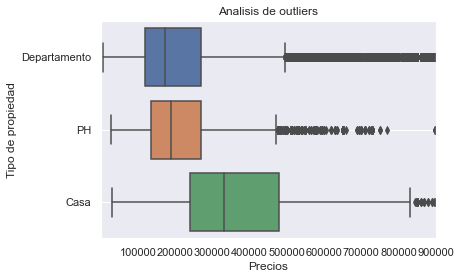

In [65]:
#analizamos los valores medios por tipo de propiedad
sns.boxplot(data = filtro_EDA, x = 'price', y = 'property_type')
plt.title('Analisis de outliers')
plt.xlabel('Precios')
plt.ylabel('Tipo de propiedad')
plt.xlim(100,900000) #definimos un xlim para hacer un grafico mas comprensible
plt.grid()
plt.show()

In [119]:
filtro_EDA= filtro_EDA[filtro_EDA.price <= 900000]
filtro_EDA.shape

(73579, 7)

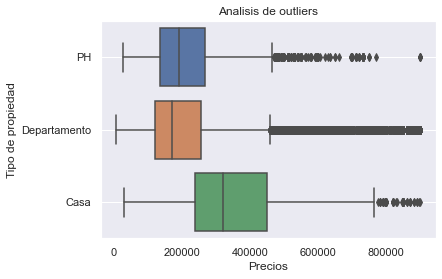

In [120]:
sns.boxplot(data = filtro_EDA, x = 'price', y = 'property_type')
plt.title('Analisis de outliers')
plt.xlabel('Precios')
plt.ylabel('Tipo de propiedad')
#plt.xlim(100,810000) #definimos un xlim para hacer un grafico mas comprensible
plt.grid()
plt.show()

   F. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

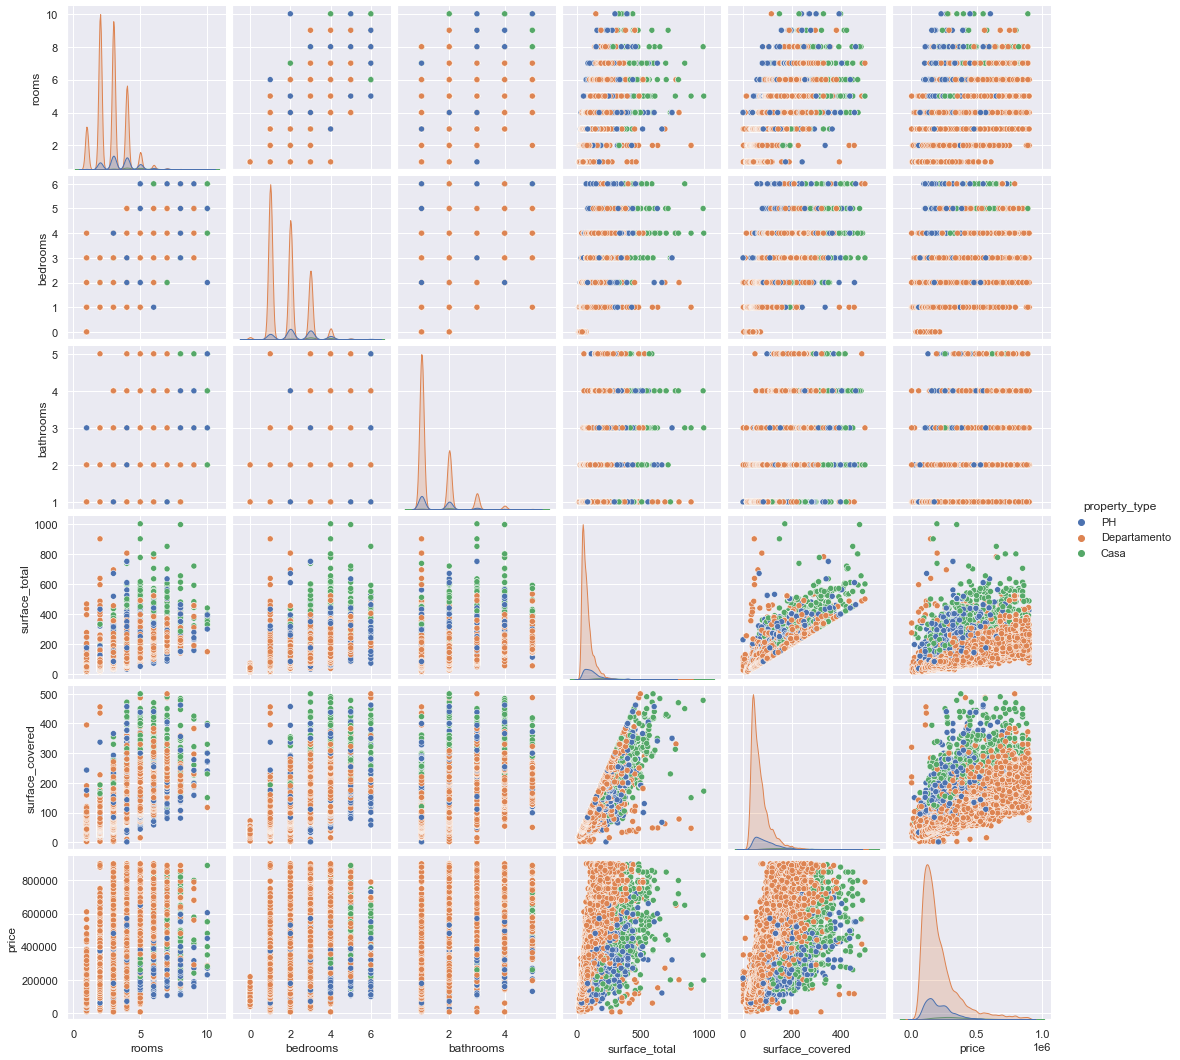

In [121]:
sns.pairplot(filtro_EDA, hue = 'property_type')

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

In [122]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
filtro_EDA.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.935612,0.590431,0.717744,0.781198,0.595135
bedrooms,0.935612,1.000000,0.595675,0.698474,0.760759,0.569531
bathrooms,0.590431,0.595675,1.000000,0.591133,0.656186,0.670534
surface_total,0.717744,0.698474,0.591133,1.000000,0.910684,0.680214
surface_covered,0.781198,0.760759,0.656186,0.910684,1.000000,0.751353
price,0.595135,0.569531,0.670534,0.680214,0.751353,1.000000


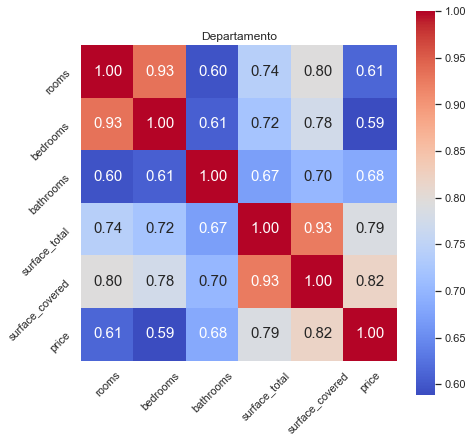

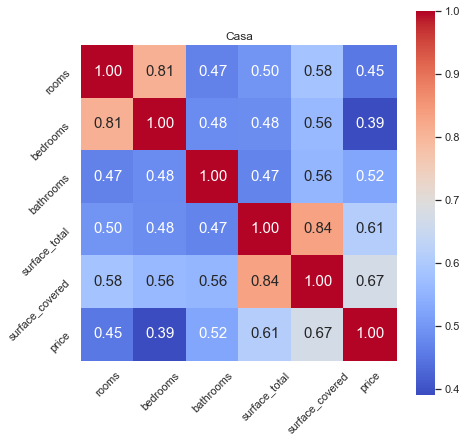

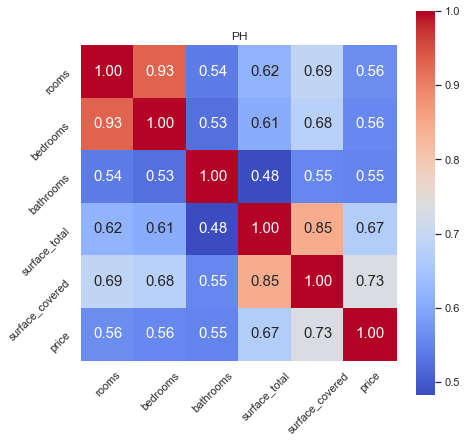

In [123]:
plt.figure(figsize=(8*3,8*3))
plt.subplot(3,3,1)
sns.heatmap(filtro_EDA[filtro_EDA.property_type== 'Departamento'].corr(), cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('Departamento')


plt.figure(figsize=(8*3,8*3))
plt.subplot(3,3,4)
sns.heatmap(filtro_EDA[filtro_EDA.property_type== 'Casa'].corr(), cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('Casa')


plt.figure(figsize=(8*3,8*3))
plt.subplot(3,3,7)
sns.heatmap(filtro_EDA[filtro_EDA.property_type== 'PH'].corr(), cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('PH')
plt.show()

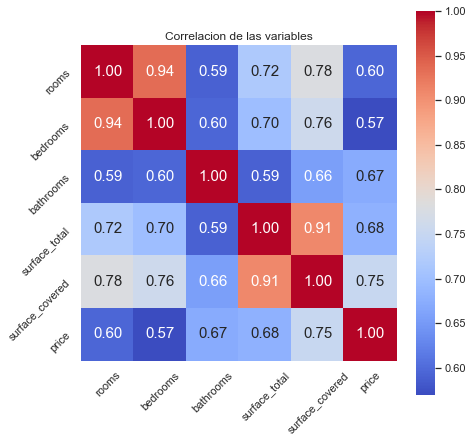

In [124]:
plt.figure(figsize=(8*3,8*3))
plt.subplot(3,3,7)
sns.heatmap(filtro_EDA.corr(), cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('Correlacion de las variables')
plt.show()

En estos ultimos graficos lo que quise ver era si cambiaba las incidencia en el precio por tipo de propiedad con respecto al general, si bien hay un cambio porcentual, pude verificar que sin importar el tipo de propiedad el precio esta mas correlacionado con la superfice cubierta en todos los casos.

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


In [88]:
fields = ['rooms', 'bedrooms','bathrooms', 'surface_total','surface_covered', 'price', 'l3','property_type']
df2= pd.read_csv('DS_Proyecto_01_Datos_Properati.csv', usecols = fields)

df4 = df2.sort_values(by='price', ascending=False)
df4.head()
df4.shape

(146660, 8)

In [89]:
#Aplicamos los filtros que ya vimos eran necesarios
filtro_df2 = df2[(df2.surface_covered <= df2.surface_total)]
filtro_df2= df2[(15 <= df2.surface_total) & (df2.surface_total<= 1000)]
filtro_df2= df2[df2.price <= 900000]


In [90]:
filtro_df2.dropna(inplace=True)

<ipython-input-90-bc8d4d82ce20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_df2.dropna(inplace=True)


In [91]:
df5 = filtro_df2.sort_values(by='price', ascending=False)
df5.head()

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
97118,Belgrano,5.0,3.0,3.0,211.0,205.0,900000.0,Departamento
83675,Recoleta,6.0,3.0,2.0,243.0,231.0,900000.0,Departamento
71696,Puerto Madero,4.0,3.0,3.0,163.0,163.0,900000.0,Departamento
16515,Belgrano,10.0,8.0,3.0,396.0,396.0,900000.0,Casa
5129,Recoleta,6.0,2.0,3.0,326.0,264.0,900000.0,Departamento


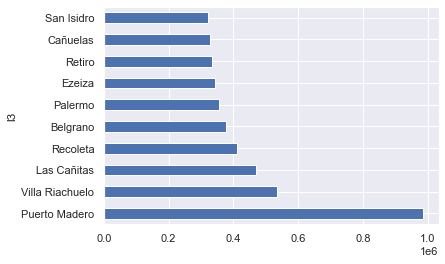

In [92]:
valor_por_ciudad = df.groupby("l3")['price'].mean()
valor_por_ciudad.sort_values(ascending=False).head(10).plot.barh()
plt.show()

Despues de aplicar los filtros y ordenar por precio, puedo decir que el barrio mas caro de buenos aires es Puerto Madero, pero hay que ver determinadas cosas, como los outliers tbn es cierto que quizas no todas las propiedades caras estan en estos anuncios analizados, tambien hay que tener en cuenta las caracteristicas de las propiedades, etc

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [125]:
# Levantamos el dataset
df = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

In [126]:
region = ['Capital Federal']
tipos = ['Departamento', 'Casa' , 'PH']
filtro_ML = df[df.property_type.isin(tipos) & df.l2.isin(region)]
filtro_ML.shape

(91485, 19)

In [127]:
filtro_ML= filtro_ML[(15 <= filtro_ML.surface_total) & (filtro_ML.surface_total<= 1000)]
filtro_ML= filtro_ML[filtro_ML.price <= 4000000]

In [128]:
columns = ['rooms', 'bedrooms','bathrooms', 'surface_total','surface_covered', 'price']
ML= filtro_ML[columns]

In [129]:
ML.dropna(inplace=True)

<ipython-input-129-57add3a25d1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ML.dropna(inplace=True)


In [146]:
ML.shape

(81019, 6)

In [147]:
ML.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.925604,0.601887,0.725799,0.304407,0.479972
bedrooms,0.925604,1.000000,0.605002,0.695523,0.291140,0.442418
bathrooms,0.601887,0.605002,1.000000,0.651924,0.275936,0.638737
surface_total,0.725799,0.695523,0.651924,1.000000,0.375749,0.686459
surface_covered,0.304407,0.291140,0.275936,0.375749,1.000000,0.298212
price,0.479972,0.442418,0.638737,0.686459,0.298212,1.000000


# *Importación de librerías*

Una vez que terminamos de trabajar con nuestro dataset para cumplir con el check point, empezamos a realizar los pasos para empezar con el modelo Machine Learning. Para ello lo primero que hacemos es importar las librerias que vamos a utilizar: 

In [131]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# *Elección de la Métrica*

Actualmente para medir el resultado de los calculos realizados en casos de regresión lo hacemos a partir del error o diferencias de errores por instancias. Donde surjen las siguientes metricas:

1. *MAE*: es el promedio de las diferencias absolutas entre las predicciones y los valores reales. La medida da una idea de la magnitud del error, pero no tiene idea de la dirección (por ejemplo, sobre o bajo predicción). 
1. *MSE*: error cuadratico medio, es muy parecido al error absoluto medio en el que proporciona una idea bruta de la magnitud del error. Tiene como inconveniente que al elevar al cuadrado hace que el y esperado tenga diferente magnitud que el y predicho.
1. *RMSE*: Raiz cuadrada del error cuadratico medio, que es la solución a la desventaja del MSE.

Por lo ante dicho, y siendo que bajo lo estudiado es la metrica mas completa para medir los resultados es que elijo para trabajar la métrica del **RMSE**.

NOTA: Como vimos las diferencias pueden ser positivas (donde el regresor sobre estima el valor de la prediccion) o negativas (donde se subestima el valor de la prediccion).

# **Benchamarck**

El Benchmarck es el primer paso, ya que es el modelo mas simple de base que sirve para comparar la eficiancia de nuestros resultados.
Como modelo sencillo elegi un arbol de decision utilizando las variables con mas correlacion que encontramos en nuestro EDA, realizado el nuestro punto anterior:

In [132]:
#Definimos nuestras variables para el benchmark
X_bench = ML[['surface_total', 'bathrooms']]
y_bench = ML['price']

In [133]:
#Separamos en train y test
X_train, X_test, y_train, y_test = train_test_split(X_bench, y_bench, test_size=0.30, random_state=42)

In [134]:
#Generamos el objeto arbol
tree_bench= DecisionTreeRegressor(max_depth=5)

In [135]:
#Entrenamos nuestro modelo
tree_bench.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [136]:
#Este paso lo hacemos para poder tener la prediccion en train y test para luego compararlas
y_train_pred = tree_bench.predict(X_train)
y_test_pred = tree_bench.predict(X_test)

In [60]:
#evaluamos nuestro modelo
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 188213.4030140634
Raíz del error cuadrático medio en Test: 191674.50660043233


C:\Users\jaeln\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jaeln\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


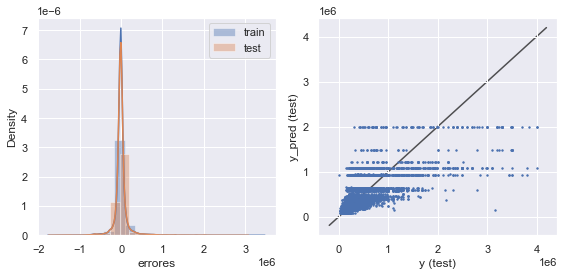

In [137]:
#GRAFICAMOS
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

# **MACHINE LEARNING MODELOS**

Definimos las variables con las que vamos a trabajar nuestro modelos de árbol y vecinos:

In [138]:
X = ML[['surface_total', 'surface_covered']] #elijo las dos variables mas correlacionadas con el precio
y = ML['price']

In [139]:
# Separamos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Encontrando el mejor hiperparámetro

In [148]:
# Definimos las listas vacias para los valores deseados
lista_train_knn = []
lista_test_knn = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos un loop sobre los distintos valores de k 
for k in k_vecinos:

    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf_knn = KNeighborsRegressor(n_neighbors= k)
    
    # Entrenar el modelo
    clf_knn.fit(X_train, y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf_knn.predict(X_train)
    rmse_train= np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf_knn.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    
    # Agregar la información a las listas
    lista_train_knn.append(rmse_train)
    lista_test_knn.append(rmse_test)
    

Text(0, 0.5, 'Error')

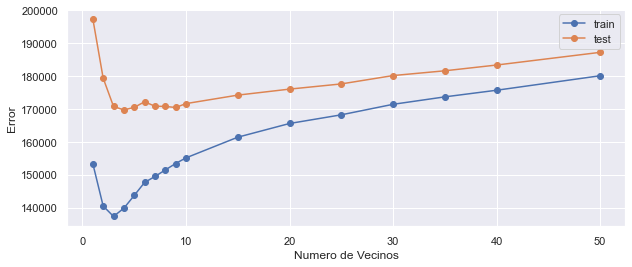

In [149]:
plt.figure(figsize = (10,4))
plt.plot(k_vecinos, lista_train_knn,'o-',label='train' )#ploteo train
plt.plot(k_vecinos, lista_test_knn,'o-',label='test') #ploteo pred
plt.legend() #habilito leyenda
plt.xlabel('Numero de Vecinos')
plt.ylabel('Error')

In [66]:
# Definimos las listas vacias para los valores deseados
lista_train_tree = []
lista_test_tree = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = np.arange(1,20)

# Generamos un loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf_tree = DecisionTreeRegressor(max_depth= max_depth, random_state=42)
    
    # Entrenar el modelo
    clf_tree.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf_tree.predict(X_train)
    rmse_train= np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf_tree.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_train_tree.append(rmse_train)
    lista_test_tree.append(rmse_test)

Text(0, 0.5, 'Error')

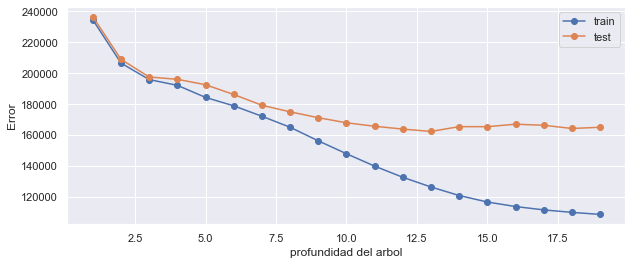

In [67]:
plt.figure(figsize = (10,4))
plt.plot(max_depths, lista_train_tree,'o-',label='train' )#ploteo train
plt.plot(max_depths, lista_test_tree,'o-',label='test') #ploteo pred
plt.legend() #habilito leyenda
plt.xlabel('profundidad del arbol')
plt.ylabel('Error')

**Conclusión**:
Por lo mostrado en los gráficos despues de las funciones iterativas donde se coloca un rango de valores para k vecinos y max_depths del árbol, considerando que lo que estamos buscando es una reducción del error, sin que tal búsqueda acabe en un overfitting o underfitting, y una aproximación entre la evaluación de test y train, es que para cada modelo elijo como hiperparámetro:
1. max_depth = 8
1. k = 20

# **Defino los modelos y los entreno**

1. *Modelo de árbol para regresión*

In [82]:
#Generamos el objeto arbol
clf_tree= DecisionTreeRegressor(max_depth= 8) 
#elijo un max depth donde considero la reduccion del error y la separacion entre train y test aceptable

In [83]:
#Entrenamos nuestros modelos
clf_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [84]:
#Predecimos para arbol
ytree_train_pred = clf_tree.predict(X_train)
ytree_test_pred = clf_tree.predict(X_test)

In [85]:
#evaluamos nuestro modelo
rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test_tree= np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en el modelo DTR en Train: {rmse_train_tree}')
print(f'Raíz del error cuadrático medio en el modelo DTR en Test: {rmse_test_tree}')

Raíz del error cuadrático medio en el modelo DTR en Train: 165569.48791320142
Raíz del error cuadrático medio en el modelo DTR en Test: 176032.14472111105


2. *Modelo de vecinos para regresión*

In [90]:
#Generamos el objeto arbol y vecino
clf_knn= KNeighborsRegressor(n_neighbors= 20)

In [91]:
#Entrenamos nuestros modelos
clf_knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=20)

In [92]:
#Predecimos para vecinos
yknn_train_pred = clf_knn.predict(X_train)
yknn_test_pred = clf_knn.predict(X_test)

In [93]:
#evaluamos nuestro modelo
rmse_train_knn = np.sqrt(mean_squared_error(y_train, yknn_train_pred))
rmse_test_knn= np.sqrt(mean_squared_error(y_test, yknn_test_pred))
print(f'Raíz del error cuadrático medio en el modelo KNN en Train: {rmse_train_knn}')
print(f'Raíz del error cuadrático medio en el modelo KNN en Test: {rmse_test_knn}')

Raíz del error cuadrático medio en el modelo KNN en Train: 165569.48791320142
Raíz del error cuadrático medio en el modelo KNN en Test: 176032.14472111105


3. *Graficamos Comparando train y test en cada modelo*

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 165084.40201364335
Raíz del error cuadrático medio en Test: 175061.8282686473


C:\Users\jaeln\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jaeln\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


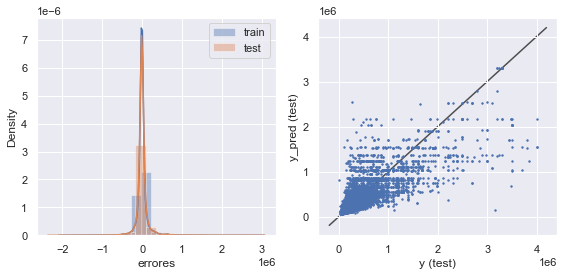

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 165569.48791320142
Raíz del error cuadrático medio en Test: 176032.14472111105


C:\Users\jaeln\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jaeln\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


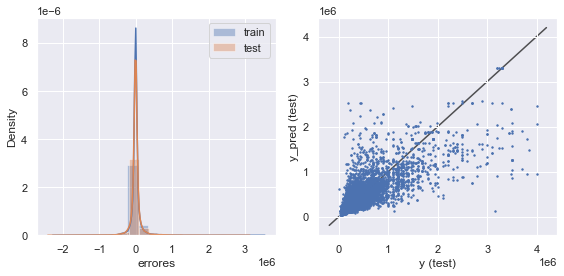

In [94]:
modelos = ['Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([clf_tree, clf_knn]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

# **Conclusiones**

Podemos ver que el RMSE tanto en el modelo de árbol como en el de vecinos es bastante parecido, pero la diferencia entre test y train cambia entre uno y el otro, por tal motivo es que elijo como modelo a presentear el de árbol de regresión ya que la diferencia entre train y test es menor.

Por otro lado, siendo crítica, puedo decir que haciendo el ejercicio como esta planteado no considero válido un modelo con esa amplitud de error, es muy grande. podria acotarse utilizando mas datos como en que barrio esta ubicado, quizas el tipo de población al que esta dirigido, la antigüedad de la construcción, etc. 
Hay datos de utilidad que no estan en el dataset y datos que si estan que no me son muy utiles como saber la fecha de publicación del aviso. En el caso de alquileres temporarios las fechas de publicación son importantes pero no asi para las ventas de inmuebles a no se que se planee como estrategia de venta reduccion de precios por antiguedad de avisos, que seria una estrategia viciada ya que los usuarios esperarian hasta ultimomento para comprar. 